# Regression
In this notebook we will consider a few regression problems.  Typically, the term *estimation* is used to describe inferring one quantity from another using a statsitical model -- i.e., using the conditional pmf or the joint second moments. When this task is performed using data, the typical term used in *regression*.  So, for example, we can have Linear Minimum Mean Squared Error (LMMSE) estimation (using means, variances, covariance) and Linear Least-Squared Error (L-LSE) regression (using sample versions of means, variances, covariances computed from a dataset).

Similarlly, we can consider the conditioal expection, which is the optimial MSE estimator, but is, in general, nonlinear function.  When trying to approximate this from a dataset, we can use a nonlinear regression.  For example, one could use a regression functon of the form $g(x) = a_2 x^2 + a_1 x + a_0$ -- i.e., a second order polynomial fit/regression.  The most common kind of nonlinear regression in modern applications is a neural network.  This is a large regression model with a huge number of parameters -- i.e., the second order polynomial above has 3 parameters, a linear regression model has 2 parameters, but nerual nets typically have thousands to even a trillion parameters.  This makes neural networks "universal approximators."  This means that if we have a large dataset that was generated from some (unknown) joint mass function, using a neural network to perform a nonlinear regression will approximate the optimal MMSE estimator -- i.e., the conditional expectation!

Based on common notions from statistics, for a large dataset generated from a known probability law, the data-driven regression results and  will converge to the results one would obtain from the joint stattsitical description.  For smaller datasets, this may not be the case though -- i.e., just as we saw that the relative frequency may be significantly off from the actual probability when the number of trials is smalll.  

Let's explore these concepts.  

## Linear Regression for Problem 3.28

From lecture, we knwon that the Linear MMSE Estimator function is

$$ g_{LMMSE}(x) = \rho \frac{\sigma_Y}{\sigma_X} (x - m_X) + m_Y = -0.390 * x + 1.622$$

Let's generate some data from this distribution and then do a linear regression...


In [25]:
import numpy as np
import matplotlib.pyplot as plt 
from scipy import stats

def generate_data_3_28(N):
    assert N > 0, f'N must be > 0, but N = {N} was passed'
    x = np.zeros(N)
    y = np.zeros(N)
    x = np.random.choice(4, N, p=[1/3, 1/3, 1/6, 1/6]) 
    for n in range(N):
        y_range = 4 - 2 * (x[n] // 2)
        y[n] = np.random.choice(y_range)
    return y, x
            

Let's do a quick test of this to make sure we are generating data according to the distribution.

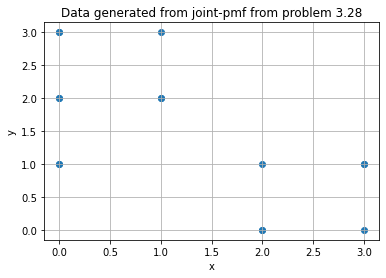

<Figure size 432x288 with 0 Axes>

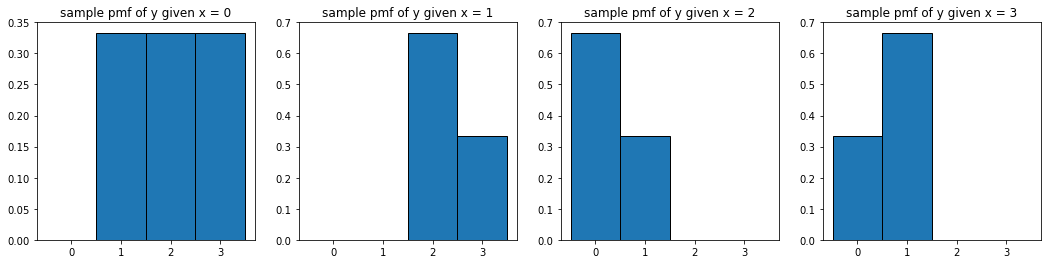

In [56]:
N = 15
y, x = generate_data_3_28(N)

plt.figure()
plt.scatter(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Data generated from joint-pmf from problem 3.28')
plt.grid(':')

plt.figure()
fig, ax = plt.subplots(1, 4, figsize=(18, 4))
for i in range(4):
    y_vals_given_x_i = y[x == i] 
    ax[i].hist(y_vals_given_x_i, bins = [-0.5, 0.5, 1.5, 2.5, 3.5],  edgecolor='k', density = True)
    ax[i].set_title(f'sample pmf of y given x = {i}')
   

In the above example, $N$ was small, so the histogram or sample pmf is not very accurate!  Let's increase $N$.

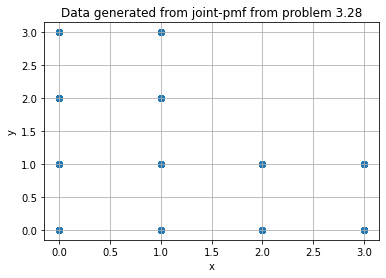

<Figure size 432x288 with 0 Axes>

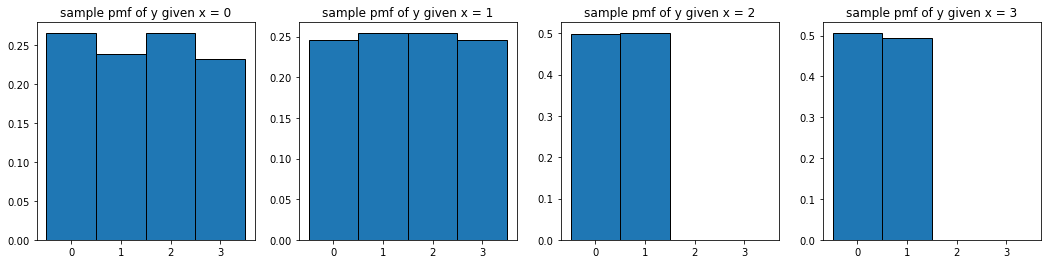

In [57]:
N = 5000
y, x = generate_data_3_28(N)

plt.figure()
plt.scatter(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Data generated from joint-pmf from problem 3.28')
plt.grid(':')

plt.figure()
fig, ax = plt.subplots(1, 4, figsize=(18, 4))
for i in range(4):
    y_vals_given_x_i = y[x == i] 
    ax[i].hist(y_vals_given_x_i, bins = [-0.5, 0.5, 1.5, 2.5, 3.5],  edgecolor='k', density = True)
    ax[i].set_title(f'sample pmf of y given x = {i}')

OK, that makes sense -- i.e., recall that the conidtional pmf for $X(u) = i$ is uniform on $\{0,1,2,3\}$ when $i = 0,1$ and uniform on $\{0,1\}$ when $i = 2,3$

Now, let's do a linear regression with small and large $N$ and see how it compares to the linear MMSE solution.  Linear regression is built into Python is several ways, let's use one of those.

Text(1.5, 2, 'y =  0.04 x +  0.89\n R =  0.028')

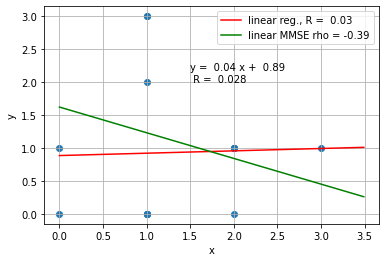

In [34]:
N = 15
y, x = generate_data_3_28(N)

slope, intercept, r_value, _, _ = stats.linregress(x, y)

x_cont = np.arange(0, 3.5, 0.01)
fig = plt.figure()
plt.plot(x_cont, slope * x_cont + intercept, color='r', label = f'linear reg., R = {r_value : 3.2f}')
plt.plot(x_cont, -0.390 * x_cont +  1.622, color='g', label = 'linear MMSE rho = -0.39')
plt.scatter(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.grid(':')
plt.legend()
axes = plt.gca()
axes.annotate(f'y = {slope : 3.2f} x + {intercept : 3.2f}\n R = {r_value : 3.2}', xy=(1.5, 2), xytext=(1.5, 2))


Text(1.5, 2, 'y = -0.38 x +  1.56\n R = -0.43')

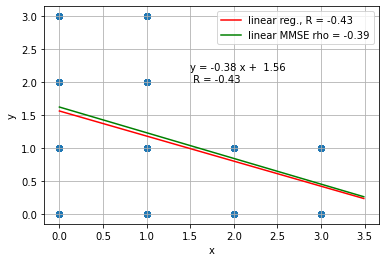

In [58]:
N = 5000
y, x = generate_data_3_28(N)

slope, intercept, r_value, _, _ = stats.linregress(x, y)

x_cont = np.arange(0, 3.5, 0.01)
fig = plt.figure()
plt.plot(x_cont, slope * x_cont + intercept, color='r', label = f'linear reg., R = {r_value : 3.2f}')
plt.plot(x_cont, -0.390 * x_cont +  1.622, color='g', label = 'linear MMSE rho = -0.39')
plt.scatter(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.grid(':')
plt.legend()
axes = plt.gca()
axes.annotate(f'y = {slope : 3.2f} x + {intercept : 3.2f}\n R = {r_value : 3.2}', xy=(1.5, 2), xytext=(1.5, 2))

# Nonlinear Regression using Neural Networks for Problem 3.

Recall that the MMSE estmator is $g(x) = \Bbb{E}\{ Y(u) | X(u) = x\}$ and for this simple problem: $g(x) = 1.5$ for $x=0,1$ and $g(x) = 0.5$ for $x=2,3$.  

Let's use a neural network to do nonlinear regression and see how this works for small $N$ and large $N$.  We can use the Tensorflow framework for this.  Unlike the linear regression case, we 

In [61]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Input, Dense

N = 15
y, x = generate_data_3_28(N)

# this sets up a simple neural network
inputs = Input(shape=(1,))
z = Dense(300, activation='sigmoid')(inputs)
z = Dense(300, activation='sigmoid')(z)
z = Dense(1)(z)

model = keras.Model(inputs=inputs, outputs=z)
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(x, y, epochs=50, verbose=0)


2022-03-10 13:38:28.502584: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Now that the model has been trained, we can use it to `predict' $y$ from $x$.

2022-03-10 13:39:29.621600: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Text(0, 0.5, 'y')

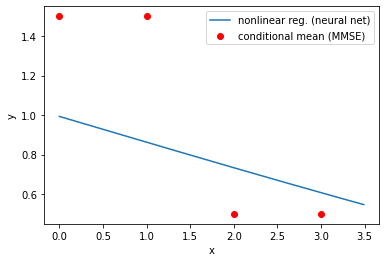

In [62]:
x_cont = np.arange(0, 3.5, 0.01)
y_cont = model.predict(x_cont)

plt.figure()
plt.plot(x_cont, y_cont, label='nonlinear reg. (neural net)')
plt.scatter([0,1,2,3], [1.5, 1.5, 0.5, 0.5], color='r', label = 'conditional mean (MMSE)')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')

Again, $N = 15$ data points is pretty small, so this is a poor approximation of the 

2022-03-10 13:40:36.660277: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-03-10 13:41:10.254984: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Text(0, 0.5, 'y')

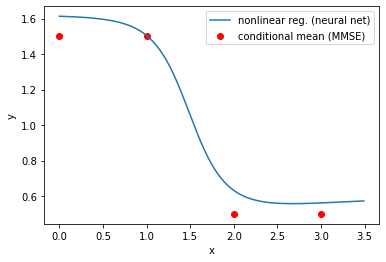

In [63]:
N = 5000
y, x = generate_data_3_28(N)

# this sets up a simple neural network
inputs = Input(shape=(1,))
z = Dense(300, activation='sigmoid')(inputs)
z = Dense(300, activation='sigmoid')(z)
z = Dense(1)(z)

model = keras.Model(inputs=inputs, outputs=z)
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(x, y, epochs=50, verbose=0)

x_cont = np.arange(0, 3.5, 0.01)
y_cont = model.predict(x_cont)

plt.figure()
plt.plot(x_cont, y_cont, label='nonlinear reg. (neural net)')
plt.scatter([0,1,2,3], [1.5, 1.5, 0.5, 0.5], color='r', label = 'conditional mean (MMSE)')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')

Yay!  Deep Learning!!! :-)